# **Importing Dependencies and getting the status of training sets**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import logging
import math

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Loading the data sets:
dataset (training data)
metadata (testing data)

In [2]:
dataset, metadata = tfds.load('mnist', as_supervised = True, with_info = True)

In [3]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
class_names = metadata.features['label'].names
print("Class name  {}" .format(class_names))

Class name  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


The format of the dataset

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples:  {}" .format(num_train_examples))
print("Number of testing examples:  {}" .format(num_test_examples))

Number of training examples:  60000
Number of testing examples:  10000


# **Pre Process the data**
we normalize to compress the dataset for efficient of model training 

In [7]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

taking an image from dataset (could be from test_dataset or train_-dataset) 
.take(n) > n represents the index

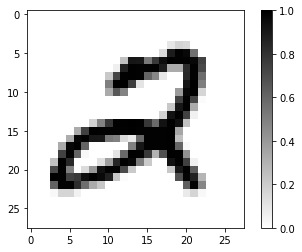

In [8]:
for image, label in test_dataset.take(1):
  break;

image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

To display multiple image from dataset


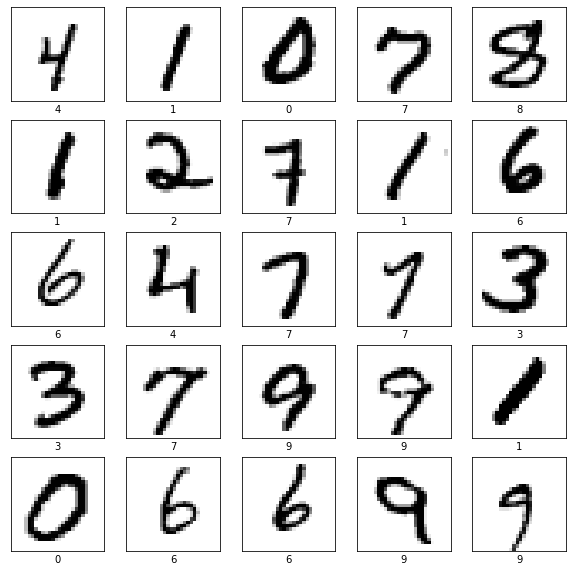

In [11]:
plt.figure (figsize = (10,10))

for i , (image, label) in enumerate (train_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])

plt.show()

# **BUILDING THE MODEL**
flatten takes the x and y pixels and flatten it into 1D data

In [12]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)                         

])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# **TRAINING THE MODEL**

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=4, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/4
1875/1875 [==============================] - 20s 4ms/step - loss: 0.2226 - accuracy: 0.9348
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0903 - accuracy: 0.9726
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.9807
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0503 - accuracy: 0.9840


# Evaluate accuracy 

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0914 - accuracy: 0.9729
Accuracy on test dataset: 0.9728999733924866


# **Make predictions and explore**

In [17]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [18]:
predictions.shape

(32, 10)

prediction is an array of 10 numbers, this describes the confidence of the model that the image corresponds to each of the 10 different numbers  

In [19]:
predictions[0]

array([2.0596960e-10, 2.1034380e-07, 9.9999881e-01, 9.2105660e-07,
       3.1053009e-08, 8.9583013e-10, 1.3034916e-10, 2.1665223e-08,
       6.0244798e-10, 1.1888119e-09], dtype=float32)

In [20]:
np.argmax(predictions[0])

2

In [21]:
test_labels[0]

2

In [22]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

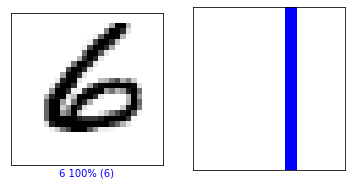

In [40]:
i = 27
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

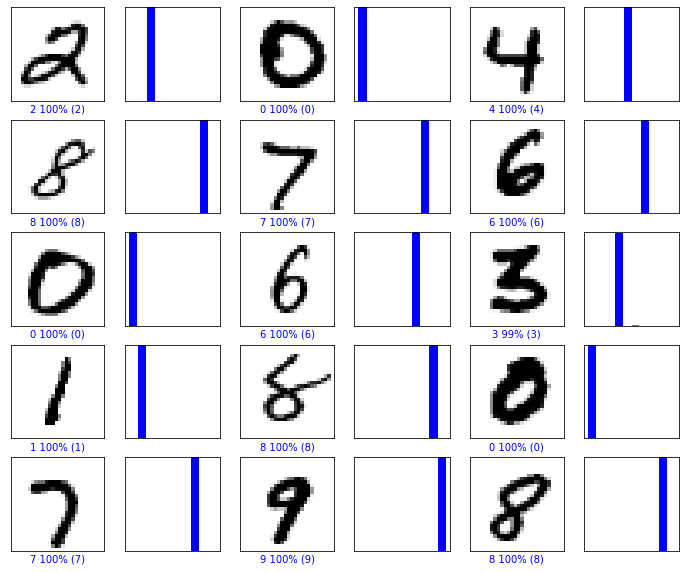

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

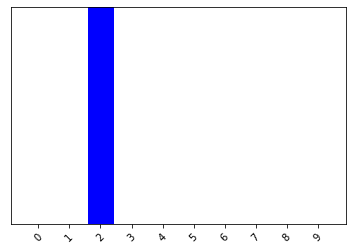

In [41]:
img = test_images[0]
img = np.array([img])
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

2